In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [ ]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

In [ ]:
item_cat_df = pd.read_csv("/content/annex1.csv")
sales_df = pd.read_csv("/content/annex2.csv")
wholesale_df = pd.read_csv("/content/annex3.csv")
avg_loss_df = pd.read_csv("/content/annex4.csv")

In [ ]:
item_cat_df.head()

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables


In [ ]:
item_cat_df.columns = item_cat_df.columns.str.replace(" ", "_")

In [ ]:
item_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item_Code      251 non-null    int64 
 1   Item_Name      251 non-null    object
 2   Category_Code  251 non-null    int64 
 3   Category_Name  251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


In [ ]:
item_cat_df[['Item_Code','Category_Code']].nunique()

Item_Code        251
Category_Code      6
dtype: int64

In [ ]:
sales_df.columns = sales_df.columns.str.replace(" ","_")

In [ ]:
sales_df.head()

,Date,Time,Item_Code,Quantity_Sold_(kilo),Unit_Selling_Price_(RMB/kg),Sale_or_Return,Discount_(Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No


In [ ]:
wholesale_df.columns = wholesale_df.columns.str.replace(" ", "_")

In [ ]:
wholesale_df.head()

,Date,Item_Code,Wholesale_Price_(RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03


In [ ]:
avg_loss_df.columns = avg_loss_df.columns.str.replace(" ", "_")

In [ ]:
avg_loss_df.head()

,Item_Code,Item_Name,Loss_Rate_(%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78


Check for Missing Values:
Use isnull() and sum() to identify missing values in each file.

In [ ]:
item_cat_df.isnull().sum()

Item_Code        0
Item_Name        0
Category_Code    0
Category_Name    0
dtype: int64

In [ ]:
sales_df.isnull().sum()

Date                           0
Time                           0
Item_Code                      0
Quantity_Sold_(kilo)           0
Unit_Selling_Price_(RMB/kg)    0
Sale_or_Return                 1
Discount_(Yes/No)              1
dtype: int64

In [ ]:
wholesale_df.isnull().sum()

Date                        0
Item_Code                   0
Wholesale_Price_(RMB/kg)    0
dtype: int64

In [ ]:
avg_loss_df.isnull().sum()

Item_Code        0
Item_Name        0
Loss_Rate_(%)    0
dtype: int64

Duplicates:

In [ ]:
item_cat_df.duplicated().value_counts()

False    251
dtype: int64

In [ ]:
sales_df.duplicated().value_counts()

False    123786
dtype: int64

In [ ]:
wholesale_df.duplicated().sum()

0

In [ ]:
avg_loss_df.duplicated().sum()

0

Data Types:

In [ ]:
item_cat_df.dtypes

Item_Code         int64
Item_Name        object
Category_Code     int64
Category_Name    object
dtype: object

In [ ]:
sales_df.dtypes

Date                            object
Time                            object
Item_Code                        int64
Quantity_Sold_(kilo)           float64
Unit_Selling_Price_(RMB/kg)    float64
Sale_or_Return                  object
Discount_(Yes/No)               object
dtype: object

In [ ]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

In [ ]:
sales_df.head()

,Date,Time,Item_Code,Quantity_Sold_(kilo),Unit_Selling_Price_(RMB/kg),Sale_or_Return,Discount_(Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No


In [ ]:
wholesale_df.dtypes

Date                         object
Item_Code                     int64
Wholesale_Price_(RMB/kg)    float64
dtype: object

In [ ]:
wholesale_df['Date'] = pd.to_datetime(wholesale_df['Date'], format = "%Y-%m-%d")

In [ ]:
avg_loss_df.dtypes

Item_Code          int64
Item_Name         object
Loss_Rate_(%)    float64
dtype: object

### Merge Files:

In [ ]:
print(sales_df['Date'].min(), sales_df['Date'].max())
print(wholesale_df['Date'].min(), wholesale_df['Date'].max())

2020-07-01 00:00:00 2020-10-24 00:00:00
2020-07-01 00:00:00 2023-06-30 00:00:00


In [ ]:
sales_wholesale_df = pd.merge(sales_df, wholesale_df, how = 'left', on = ['Item_Code', "Date"])
sales_wholesale_df.head()

,Date,Time,Item_Code,Quantity_Sold_(kilo),Unit_Selling_Price_(RMB/kg),Sale_or_Return,Discount_(Yes/No),Wholesale_Price_(RMB/kg)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,4.32
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,2.10
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,4.32
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,7.03
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,4.60


In [ ]:
sales_wholesale_df.isnull().sum()

Date                           0
Time                           0
Item_Code                      0
Quantity_Sold_(kilo)           0
Unit_Selling_Price_(RMB/kg)    0
Sale_or_Return                 1
Discount_(Yes/No)              1
Wholesale_Price_(RMB/kg)       0
dtype: int64

In [ ]:
sales_wholesale_cat_df = pd.merge(sales_wholesale_df, item_cat_df, how = 'left', on = ['Item_Code'])
sales_wholesale_cat_df.head()

,Date,Time,Item_Code,Quantity_Sold_(kilo),Unit_Selling_Price_(RMB/kg),Sale_or_Return,Discount_(Yes/No),Wholesale_Price_(RMB/kg),Item_Name,Category_Code,Category_Name
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,4.32,Paopaojiao (Jingpin),1011010504,Capsicum
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,2.10,Chinese Cabbage,1011010101,Flower/Leaf Vegetables
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,4.32,Paopaojiao (Jingpin),1011010504,Capsicum
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,7.03,Shanghaiqing,1011010101,Flower/Leaf Vegetables
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,4.60,Caixin,1011010101,Flower/Leaf Vegetables


In [ ]:
data = pd.merge(sales_wholesale_cat_df, avg_loss_df, how = 'left', on = ['Item_Code', 'Item_Name'])
data.head()

,Date,Time,Item_Code,Quantity_Sold_(kilo),Unit_Selling_Price_(RMB/kg),Sale_or_Return,Discount_(Yes/No),Wholesale_Price_(RMB/kg),Item_Name,Category_Code,Category_Name,Loss_Rate_(%)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,4.32,Paopaojiao (Jingpin),1011010504,Capsicum,7.08
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,2.10,Chinese Cabbage,1011010101,Flower/Leaf Vegetables,22.27
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,4.32,Paopaojiao (Jingpin),1011010504,Capsicum,7.08
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,7.03,Shanghaiqing,1011010101,Flower/Leaf Vegetables,14.43
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,4.60,Caixin,1011010101,Flower/Leaf Vegetables,13.70


In [ ]:
data['Discount_(Yes/No)'].value_counts()

No     120191
Yes      3594
Name: Discount_(Yes/No), dtype: int64

In [ ]:
data['Discount_(Yes/No)'] = data['Discount_(Yes/No)'].map({'No' : False, "Yes":True})
data['Discount_(Yes/No)'].value_counts()

False    120191
True       3594
Name: Discount_(Yes/No), dtype: int64

### Descriptive Statistics

In [ ]:
data = data.assign(total_sales = data['Quantity_Sold_(kilo)'] * data['Unit_Selling_Price_(RMB/kg)'])
data.head(5)

,Date,Time,Item_Code,Quantity_Sold_(kilo),Unit_Selling_Price_(RMB/kg),Sale_or_Return,Discount_(Yes/No),Wholesale_Price_(RMB/kg),Item_Name,Category_Code,Category_Name,Loss_Rate_(%),total_sales
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,False,4.32,Paopaojiao (Jingpin),1011010504,Capsicum,7.08,3.0096
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,False,2.10,Chinese Cabbage,1011010101,Flower/Leaf Vegetables,22.27,2.7168
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,False,4.32,Paopaojiao (Jingpin),1011010504,Capsicum,7.08,3.1084
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,False,7.03,Shanghaiqing,1011010101,Flower/Leaf Vegetables,14.43,4.2100
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,False,4.60,Caixin,1011010101,Flower/Leaf Vegetables,13.70,4.3120


In [ ]:
total_sales_per_day = data.groupby(['Date'])['total_sales'].sum().reset_index()
total_sales_per_day

,Date,total_sales
0,2020-07-01,3472.0136
1,2020-07-02,3456.5429
2,2020-07-03,3384.7701
3,2020-07-04,4394.8624
4,2020-07-05,4471.5748
5,2020-07-06,3382.9821
6,2020-07-07,3226.8223
7,2020-07-08,3463.7944
8,2020-07-09,3198.0202
9,2020-07-10,3548.1649


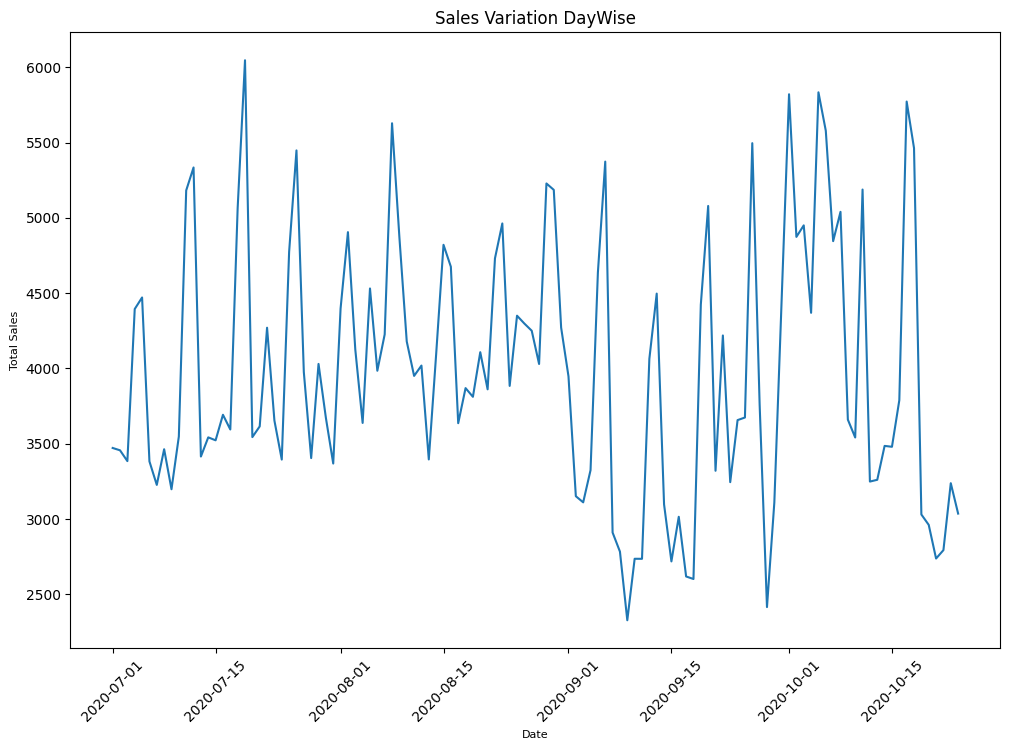

In [ ]:
plt.figure(figsize = (12,8))
sns.lineplot(x= total_sales_per_day['Date'], y = total_sales_per_day['total_sales'])
plt.title("Sales Variation DayWise", size = 12)
plt.xlabel("Date", size = 8)
plt.xticks(rotation = 45)
plt.ylabel("Total Sales", size = 8)
plt.show()

In [ ]:
## unique items in the list

data['Item_Name'].nunique()

74

In [ ]:
avg_selling_price_each_item = data.groupby(['Item_Name'])['Unit_Selling_Price_(RMB/kg)'].mean().reset_index().rename(columns = {"Unit_Selling_Price_(RMB/kg)" : "Avg_Selling_Price"})
avg_selling_price_each_item


,Item_Name,Avg_Selling_Price
0,7 Colour Pepper (1),17.914815
1,Amaranth,5.778019
2,Apricot Bao Mushroom (1),10.814202
3,Apricot Bao Mushroom (Bag),5.285580
4,Bell Pepper (1),11.073770
5,Black Chicken Mushroom,116.000000
6,Broccoli,12.686434
7,Caidian Quinoa Artemisia,15.876923
8,Caixin,7.597125
9,Chicken Fir Bacteria,75.800000


In [ ]:
avg_selling_price_each_category = data.groupby(['Category_Name'])['Unit_Selling_Price_(RMB/kg)'].mean().reset_index().rename(columns = {"Unit_Selling_Price_(RMB/kg)" : "Avg_Selling_Price"})
avg_selling_price_each_category

,Category_Name,Avg_Selling_Price
0,Aquatic Tuberous Vegetables,10.027819
1,Cabbage,10.642243
2,Capsicum,10.715621
3,Edible Mushroom,14.035146
4,Flower/Leaf Vegetables,7.756329
5,Solanum,7.356095


In [ ]:
top_selling_item = avg_selling_price_each_item.nlargest(1, 'Avg_Selling_Price')
top_selling_item

,Item_Name,Avg_Selling_Price
5,Black Chicken Mushroom,116.0


### Time Based Analysis

In [ ]:
## monthly sales data

monthly_sales_data = data.groupby(data['Date'].dt.month)['total_sales'].sum().reset_index().rename(columns = {"Date" : "Month"}).round(0).astype('int')
monthly_sales_data

,Month,total_sales
0,7,122550
1,8,133930
2,9,106521
3,10,100003


In [ ]:
## year_monthly sales data

year_monthly_sales_data = data.groupby(data['Date'].dt.strftime('%Y-%m'))['total_sales'].sum().reset_index().rename(columns = {"Date" : "year_month"})
year_monthly_sales_data.head(5)

,year_month,total_sales
0,2020-07,122550.2935
1,2020-08,133930.3319
2,2020-09,106520.8334
3,2020-10,100002.7042


[]

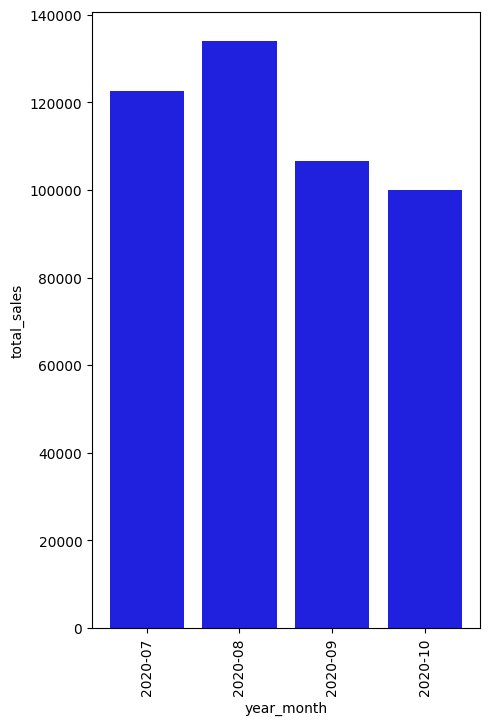

In [ ]:
plt.figure(figsize = (5, 8))
ax = sns.barplot(x = year_monthly_sales_data['year_month'],
            y = year_monthly_sales_data['total_sales'],
            color = 'blue')
plt.xticks(rotation = 90)
plt.plot()

### Peak Sales Time:

In [ ]:
## highest sales during which day time

highest_sales_in_day = data.groupby(pd.to_datetime(data['Time']).dt.hour)['total_sales'].max().reset_index().rename(columns = {"Time" : "Hour"})
highest_sales_in_day

,Hour,total_sales
0,9,28.7672
1,10,32.4824
2,11,21.4400
3,12,28.0720
4,13,25.1064
5,14,22.5500
6,15,26.1680
7,16,22.9320
8,17,21.8080
9,18,23.6560


In [ ]:
result = highest_sales_in_day.sort_values(by = 'total_sales', ascending = False).iloc[:1, :]
result

,Hour,total_sales
12,21,128.024


### Price Analysis

In [ ]:
data.columns

Index(['Date', 'Time', 'Item_Code', 'Quantity_Sold_(kilo)',
       'Unit_Selling_Price_(RMB/kg)', 'Sale_or_Return', 'Discount_(Yes/No)',
       'Wholesale_Price_(RMB/kg)', 'Item_Name', 'Category_Code',
       'Category_Name', 'Loss_Rate_(%)', 'total_sales'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123786 entries, 0 to 123785
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Date                         123786 non-null  datetime64[ns]
 1   Time                         123786 non-null  object        
 2   Item_Code                    123786 non-null  int64         
 3   Quantity_Sold_(kilo)         123786 non-null  float64       
 4   Unit_Selling_Price_(RMB/kg)  123786 non-null  float64       
 5   Sale_or_Return               123785 non-null  object        
 6   Discount_(Yes/No)            123785 non-null  object        
 7   Wholesale_Price_(RMB/kg)     123786 non-null  float64       
 8   Item_Name                    123786 non-null  object        
 9   Category_Code                123786 non-null  int64         
 10  Category_Name                123786 non-null  object        
 11  Loss_Rate_(%)             

In [ ]:
data['Discount_(Yes/No)'].value_counts()

False    120191
True       3594
Name: Discount_(Yes/No), dtype: int64

In [ ]:
## filtering out all those results where Discount was given
discounted_sales = data.query('`Discount_(Yes/No)` == True')
discounted_sales.head()

,Date,Time,Item_Code,Quantity_Sold_(kilo),Unit_Selling_Price_(RMB/kg),Sale_or_Return,Discount_(Yes/No),Wholesale_Price_(RMB/kg),Item_Name,Category_Code,Category_Name,Loss_Rate_(%),total_sales
369,2020-07-01,13:10:00.170,102900005118831,1.000,6.4,sale,True,4.13,Wawacai,1011010101,Flower/Leaf Vegetables,2.48,6.400
580,2020-07-01,16:56:13.023,102900005119975,0.628,4.0,sale,True,3.60,Hongshujian,1011010101,Flower/Leaf Vegetables,8.42,2.512
602,2020-07-01,17:16:15.655,102900005119975,0.427,4.0,sale,True,3.60,Hongshujian,1011010101,Flower/Leaf Vegetables,8.42,1.708
620,2020-07-01,17:28:09.389,102900005119975,0.201,4.0,sale,True,3.60,Hongshujian,1011010101,Flower/Leaf Vegetables,8.42,0.804
639,2020-07-01,17:43:17.748,102900005116530,0.195,16.0,sale,True,10.80,Xixia Mushroom (1),1011010801,Edible Mushroom,13.82,3.120


In [ ]:
## calculate statistics for discounted sales and without discounted sales [for comparison using average]

total_discounted_sales = discounted_sales.groupby(['Date', 'Category_Name']).agg({
    "Loss_Rate_(%)" : 'mean',
    "total_sales" : 'sum'
}).reset_index().rename(columns = {"Loss_Rate_(%)" : 'pct_Loss_Rate',
                                   "Category_Name" : "Category"})
total_discounted_sales

,Date,Category,pct_Loss_Rate,total_sales
0,2020-07-01,Edible Mushroom,13.820000,3.1200
1,2020-07-01,Flower/Leaf Vegetables,8.234375,57.1400
2,2020-07-02,Flower/Leaf Vegetables,8.191471,91.9771
3,2020-07-03,Aquatic Tuberous Vegetables,29.250000,32.5930
4,2020-07-03,Flower/Leaf Vegetables,9.568462,33.2039
5,2020-07-04,Capsicum,10.180000,5.8608
6,2020-07-04,Edible Mushroom,13.820000,7.7964
7,2020-07-04,Flower/Leaf Vegetables,10.300000,13.0872
8,2020-07-05,Capsicum,10.180000,6.3240
9,2020-07-05,Flower/Leaf Vegetables,8.456667,29.0373


[]

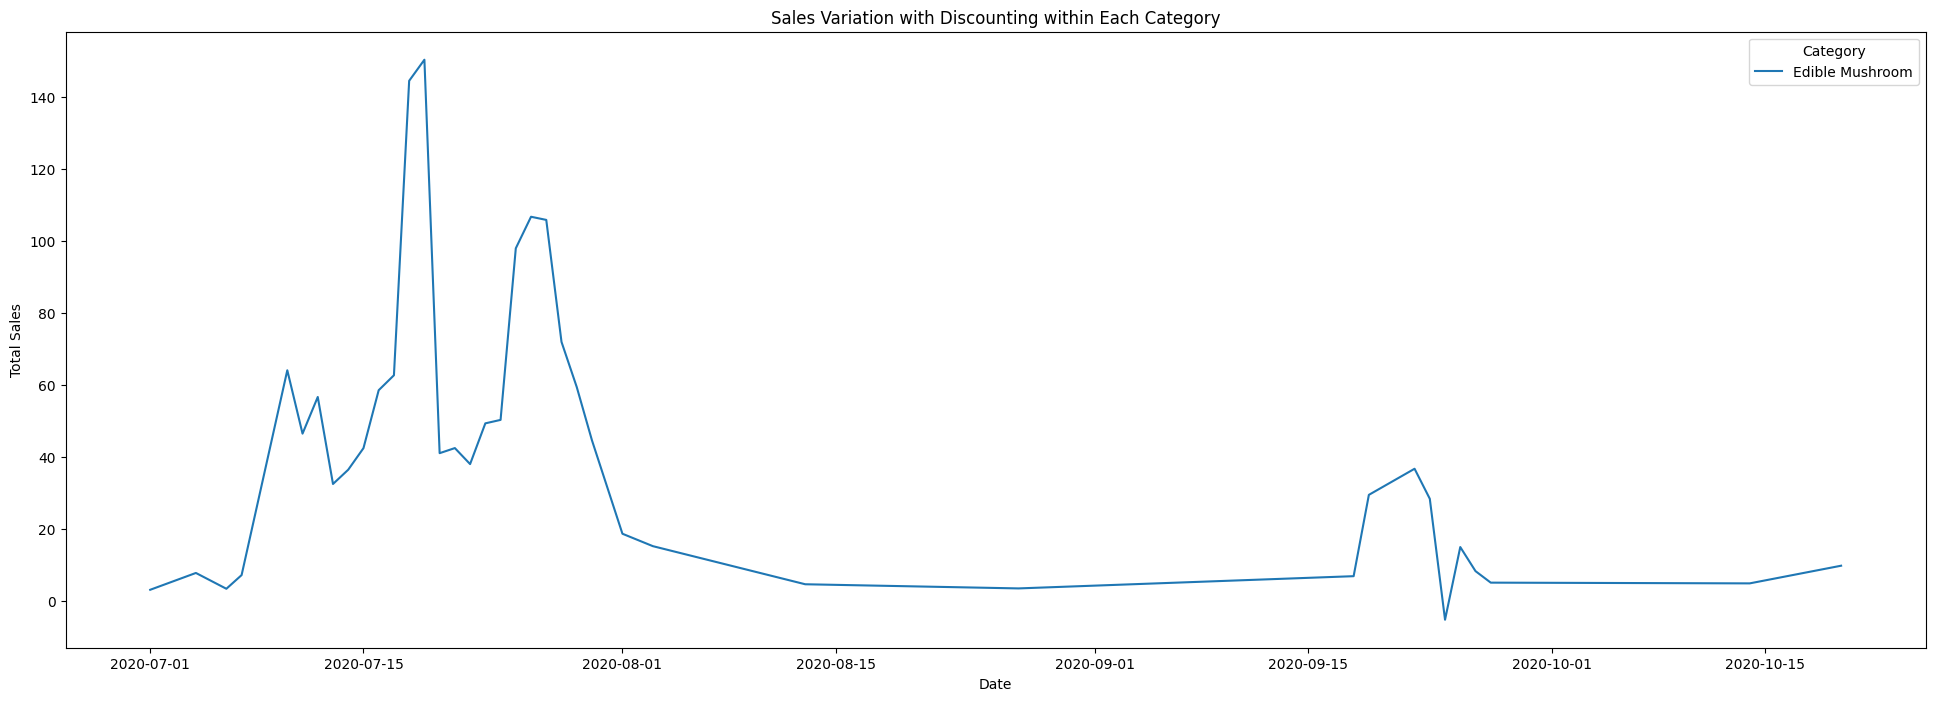

In [ ]:
## visualize the results to see whether total_sales increasing or decreasing day by day after discount is applied

plt.figure(figsize = (24, 8))

sns.lineplot(x = total_discounted_sales['Date'],
             y = total_discounted_sales['total_sales'],
             hue = total_discounted_sales[total_discounted_sales['Category'] == 'Edible Mushroom']['Category'])
plt.title("Sales Variation with Discounting within Each Category", size = 12)
plt.xlabel("Date", size = 10)
plt.ylabel("Total Sales", size = 10)
plt.plot()

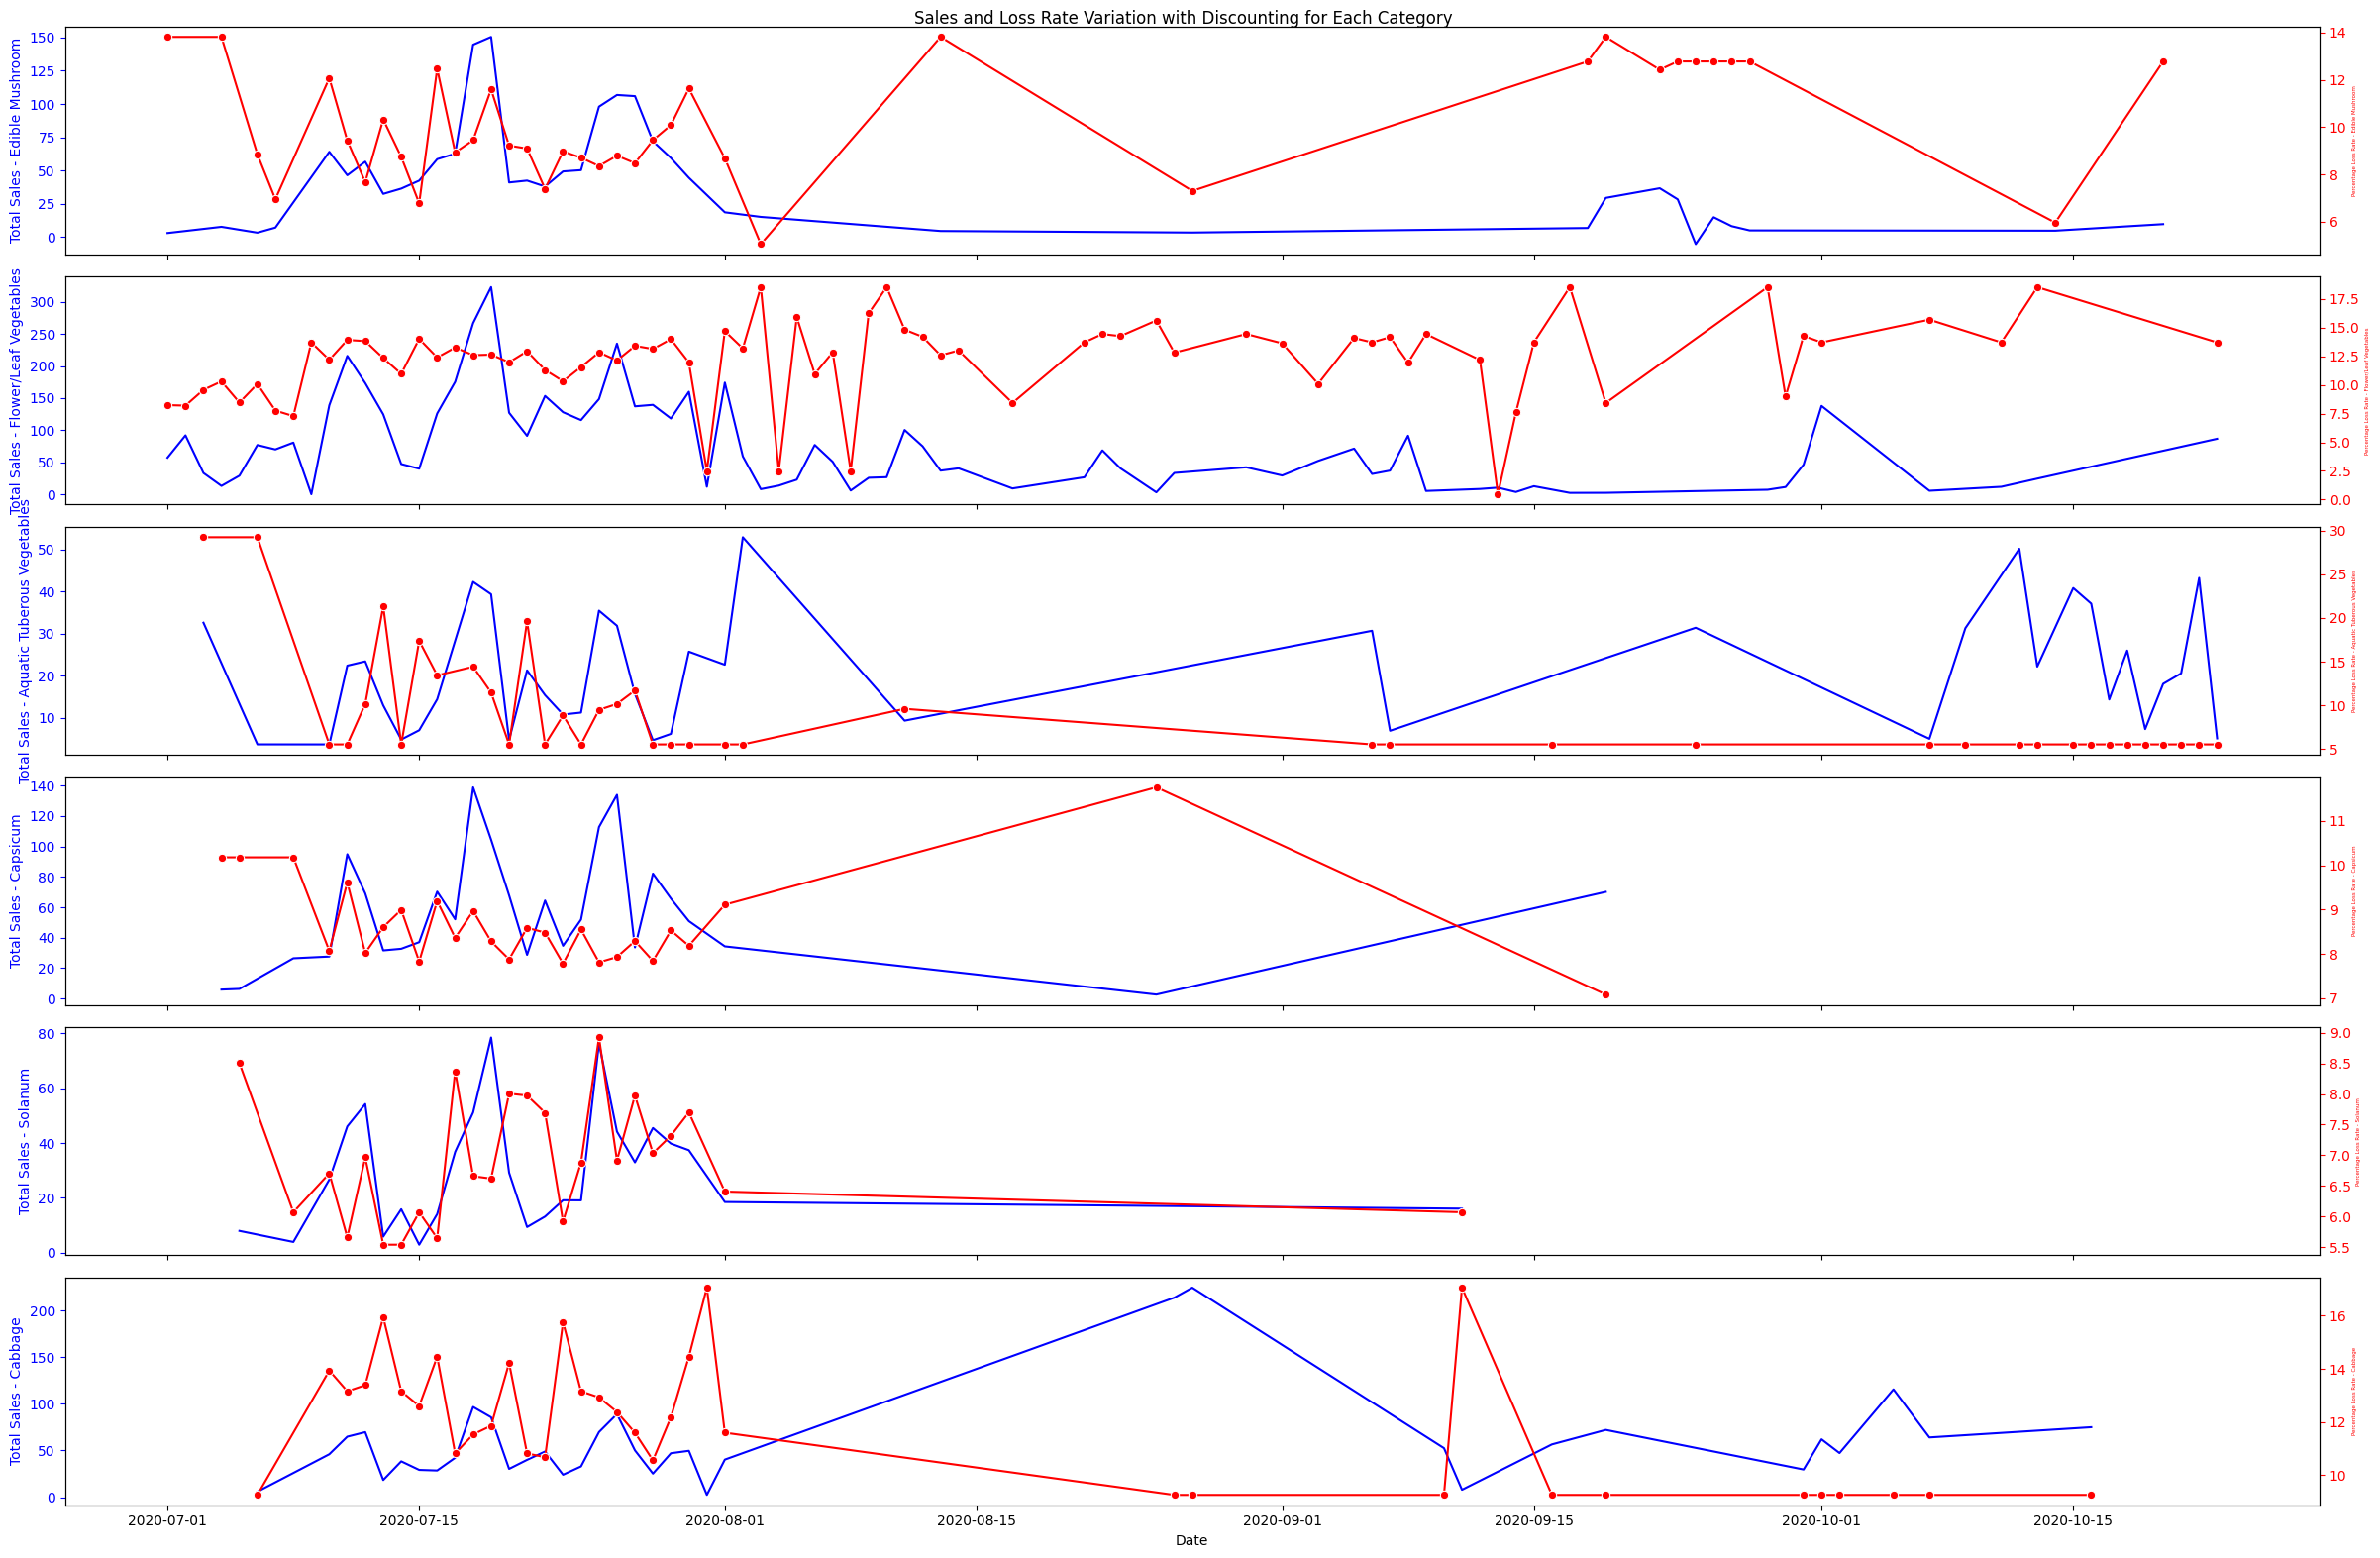

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have total_discounted_sales DataFrame

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(total_discounted_sales['Category'].unique()), ncols=1, figsize=(24,16), sharex=True)

# Loop through each category and plot
for i, category in enumerate(total_discounted_sales['Category'].unique()):
    subset_data = total_discounted_sales[total_discounted_sales['Category'] == category]

    # Plot total sales as bars
    sns.lineplot(x='Date', y='total_sales', data=subset_data, ax=axes[i], color='b')
    axes[i].set_ylabel(f'Total Sales - {category}', color='b', size=10)
    axes[i].tick_params('y', colors='b')

    # Create a second y-axis for Loss Rate
    ax2 = axes[i].twinx()
    sns.lineplot(x='Date', y='pct_Loss_Rate', data=subset_data, marker='o', ax=ax2, color='r')
    ax2.set_ylabel(f'Percentage Loss Rate - {category}', color='r', size=4)
    ax2.tick_params('y', colors='r')

# Set common labels and title
plt.suptitle("Sales and Loss Rate Variation with Discounting for Each Category", size=12)
plt.xlabel("Date", size=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()